## Descrição do dataset
O conjunto de dados escolhido surge de uma competição realizada pela **Microsoft** para prever se um dado dispositivo vai ser atacado por um *malware*. Este conjunto de dados é extenso visto que tem cerca de 9 milhões de linhas e 83 variáveis (incluindo a variável resposta) nos dados de treino, o que vai exigir algum trabalho adicional para preparar e tratar os dados.

Como foi referido anteriormente, o objetivo do trabalho é prever se uma dada máquina será atacada por um programa malicioso, consoante as suas características.

#### Razões da escolha
O que nos levou a escolher este conjunto de dados foram essencialmente 2 razões. A primeira razão passa por este *dataset* abordar um tema com o qual estamos diretamente relacionados. A outra razão baseia-se na dimensão do *dataset* escolhida. 

#### Problemas encontrados
Inicialmente tentamos realizar uma pequena análise apenas para carregar o conjunto de dados e verificar os diferentes valores, no entanto era impossível carregar os dados por serem demasiados. Consequentemente tivemos de selecionar menos linhas do *dataset* para que fosse possível trabalhar com os dados. Selecionamos aleatoriamente 600000 linhas.

## Fazer breve desrição do dataset
## Explicar que foi impossível conseguir carregar o dataset e por isso decidimos sleecionar apenas 600k linhas

## Falar da estratégia que usamos para explorar os dados

### Vimos para cada coluna o número de valores nulos e caso fosse muito alto eliminamos
### Vimos para cada coluna o número de diferentes atributos e caso fosse demasiado alto eliminamos
### Vimos para cada coluna os valores diferentes dos atributos para verificar se era possível serem agrupados
### Vimos para cada coluna que continha NAs a percentagem de cada atributo para verificar se alteravamos pelo valor modal ou era necessário prever
### Vimos os outliers nas numéricoas para verificar se deviamos alterar pela média ou mediana e o mesmo para a standardização

#### Apenas referir detalhadamente os casos relevantes
    - ou seja aqueles em que existiam NAs, ou muitos ateributos e n davam para agrupar, os que davam para agrupar e os q era necessário pever
    - para além disso falar daquele do peixoto q eliminamos por ser parecido a ouro e o do carlos OS_BUILDQQCOISA por ter valores que os outros estavam contidos nele

## Exploração inicial
Inicialmente realizmos uma exploração dos dados para verificar as variáveis do conjunto de dados. Primeiro verificamos quantas linhas completas existiam no *dataset* e concluímos que não existia nenhuma. De seguida, e com o auxílio da descrição das variáveis, verificamos quais variáveis são quantitativas e quais são qualitativas. Chegamos à conclusão que existem apenas 10 variáveis quantitativas, o que mostrou ser um pequeno problema visto que a maior parte dos modelos apenas trabalha com valores numéricos, ou seja, era necessário tratar os dados.

#### Variáveis qualitativas
Para cada coluna qualitativa do dataset verificamos as seguintes informações:
- número de valores nulos
- número total de valores diferentes

Após esta análise decidimos eliminar todas as variáveis que continham um número elevado de valores nulos, visto que consideramos que tratar essas variáveis pode ser um erro pelo facto de a informação referente às mesmas ser praticamente nula. Consideramos então que colunas com mais de 95% de NAs seriam intratáveis pelo que optamos por eliminar essas colunas.

De seguida verificamos o número total de valores diferentes para cada coluna. Isto demonstra ser importante visto que caso uma variável categórica apresente muitos valores não agrupáveis, além de não ser muito útil para efetuar previsões, dificulta a plicação de métodos tradicionais de *machine learning* dado que após efetuar *One-Hot-Encoding*, esta variável iria gerar demasiadas colunas. Por esta razão decidimos eliminar todas as colunas com muitos valores distintos não agrupáveis. Verificamos que existiam bastantes colunas com um número elevado de valores, pelo que decidimos verificar quais os diferentes valores para cada uma das colunas, visto que alguns valores podiam ser agrupados. Por exemplo:
- caso o identificador de cidade contivesse o nome da cidade este podia ser substituído pelas coordenadas geográficas, em vez de simplesmente ser eliminado. Isto não se verificou pois o identificador era apenas um inteiro.
- em certos casos existiam colunas do tipo X.Y.Z.W que podiam ser agrupadas
- ainda noutros casos existiam valores que eram diferentes mas referem o mesmo (por exemplo: On e ON)

Basicamente tentamos tratar os dados, agrupando alguns valores e limpando outros também.
Chegamos à conclusão que a maior parte dos identificadores presentes no *dataset* seriam eliminados pelo facto de serem inteiros e não ser possível agrupá-los, pelo que os que continham muitos valores (que definimos como sendo acima de 100 valores diferentes) foram todos eliminados.
Eliminamos também atributos que apenas continham 1 valor diferente pelo facto de não acrescentarem nada de novo.

Relativamente às colunas que apresentam NAs, é necessário substituí-los. Para isso, verificamos a frequência de cada valor da coluna e caso esta seja superior a 94%, substituímos os NAs pelo valor modal. Caso contrário, prevemos o valor dos NAs.

#### Variáveis quantitativas
O tratamento das variáveis quantitativas foi bastante mais simples, visto que apenas verificamos a existência de *outliers*. Isto é importante pois deve-se substituir os NAs:
- pela média, se não exisitirem *outliers*;
- pela mediana, caso existam *outliers*.

E ainda pelo facto de que a *standardização* deve ser realizada com a seguinte equação:

- (x - média ) / desvio-padrão, caso não existam *outliers*
- (x - mediana ) / intervalo entre quartis, caso existam

De referir que neste tratamento dos dados para calcular a média, mediana e os restantes valores não usamos os dados de teste e depois aplicamos a equção e substituição a todo o *dataset*.

Para as variáveis quantitativas decidimos verificar as correlações entre elas contudo mantivemos todas as variáveis pelo facto de serem muito poucas e apenas existia uma correlação possivelmente elevada. 

In [2]:
import pandas as pd

In [3]:
ms = pd.read_csv('../../sample_train.csv', low_memory=False)

### Variáveis eliminadas por apenas conterem 1 valor distinto

Eliminamos estas variáveis porque uma variável que apenas contém um valor distinto não acrescenta qualquer informação ao conjunto de dados.

In [4]:
ms.nunique()[ms.nunique() == 1]

PuaMode                       1
Census_IsFlightingInternal    1
Census_IsWIMBootEnabled       1
dtype: int64

### Variáveis eliminados por excesso de NAs
Consideramos este número de valores nulos demasiado elevado para realizarmos qualquer presunção acerca dos dados.
Para além disso não temos qualquer noção de algum valor de referência em qualquer variável.

In [5]:
ms[['PuaMode','DefaultBrowsersIdentifier','Census_ProcessorClass']].isna().sum() / ms.shape[0]

PuaMode                      0.999772
DefaultBrowsersIdentifier    0.951490
Census_ProcessorClass        0.995868
dtype: float64

### Variáveis eliminadas por excesso de valores

Eliminamos estas variáveis à partida porque contêm um número demasiado elevado de valores distintos (acima de 1000) onde não é possível agrupar os valores.
Como os métodos de *machine learning* tradicional não conseguem tratabalhar eficientemente com tantos valores de *input* como os de *deep learning* tivemos de limitar um pouco esses valores. Caso mantivessemos todas as variáveis ficavamos com um número de *inputs* na ordem das centenas de milhares.

In [6]:
ms[['CityIdentifier',
'AVProductStatesIdentifier',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorModelIdentifier',
'Census_FirmwareVersionIdentifier']].nunique()

CityIdentifier                      40323
AVProductStatesIdentifier            6100
Census_OEMNameIdentifier             1664
Census_OEMModelIdentifier           45094
Census_ProcessorModelIdentifier      2331
Census_FirmwareVersionIdentifier    25074
dtype: int64

### Variáveis em risco de serem eliminadas por um excesso de atributos
As seguintes variáveis estavam em risco de serem eliminadas por conterem um número elevado de valores diferentes e pelos mesmos não serem agrupáveis. Podemos verificar que a maior parte são identificadores, que foram o maior problema para o tratamento dos dados.
Vamos realizar uma pequena análise para tentar perceber quais as variáveis que mantemos.

In [7]:
risco = ['CountryIdentifier','IeVerIdentifier',
    'Census_OSBuildNumber','Census_OSBuildRevision',
    'Census_OSUILocaleIdentifier','GeoNameIdentifier',
   'LocaleEnglishNameIdentifier','Census_FirmwareManufacturerIdentifier',
        'OsBuildLab']
ms[risco].nunique()

CountryIdentifier                        222
IeVerIdentifier                          189
Census_OSBuildNumber                      64
Census_OSBuildRevision                   239
Census_OSUILocaleIdentifier               94
GeoNameIdentifier                        266
LocaleEnglishNameIdentifier              241
Census_FirmwareManufacturerIdentifier    314
OsBuildLab                               472
dtype: int64

In [7]:
for var in risco:
    print(ms[var].value_counts() / ms[var].value_counts().sum() * 100)

43     4.406000
29     3.891667
141    3.707500
93     3.178000
171    3.162333
60     2.604500
201    2.482000
207    2.395500
66     2.315500
89     2.275167
97     2.188167
214    2.156333
158    2.068167
44     2.050667
9      1.955167
107    1.865167
203    1.807500
51     1.797833
41     1.784333
68     1.779500
35     1.555000
160    1.489500
195    1.483333
142    1.470667
149    1.456333
205    1.330333
155    1.237833
164    1.205500
173    1.081000
159    1.027000
         ...   
182    0.008667
74     0.008333
5      0.007833
198    0.007833
215    0.007667
28     0.007333
197    0.007333
123    0.007000
75     0.007000
196    0.006833
192    0.006167
126    0.006167
114    0.006167
105    0.006000
14     0.006000
64     0.005333
79     0.004833
187    0.004500
174    0.004500
200    0.004167
10     0.004000
212    0.003833
216    0.003500
128    0.003167
193    0.002667
217    0.002500
161    0.002500
186    0.002500
165    0.002333
37     0.001667
Name: CountryIdentifier,

17134.1.amd64fre.rs4_release.180410-1804                 40.942803
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    13.996713
16299.15.amd64fre.rs3_release.170928-1534                10.832369
15063.0.amd64fre.rs2_release.170317-1834                  8.094027
17134.1.x86fre.rs4_release.180410-1804                    2.864343
16299.15.x86fre.rs3_release.170928-1534                   2.614509
14393.2189.amd64fre.rs1_release.180329-1711               2.173007
10240.17443.amd64fre.th1.170602-2340                      1.926840
10586.1176.amd64fre.th2_release_sec.170913-1848           1.659339
15063.0.x86fre.rs2_release.170317-1834                    0.712002
14393.0.amd64fre.rs1_release.160715-1616                  0.651502
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800       0.628502
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033       0.617002
16299.637.amd64fre.rs3_release_svc.180808-1748            0.497502
14393.2189.x86fre.rs1_release.180329-1711                 0.43

Decidimos eliminar as variáveis acima descritas, considerando apenas as que aparecem menos de 100 vezes.
Num contexto diferente podíamos ter feito uma análise mais refinada, mas visto que já temos centenas de variáveis decidimos manter apenas as que pareciam relevantes.
Possivelmente o filtro de variância ia eliminar as outras "variáveis" (depois de realizado o *one-hot encoding*) das outras variáveis, mas neste caso optamos por simplificar a análise.

### Variáveis eliminadas por serem semelhantes a outras variáveis

- Census_ChassisTypeName
    - Esta variável possui várias semelhanças com outras duas variáveis já existentes no dataset: "Census_MDC2FormFactor" e "Census_PowerPlatformRoleName". Além disso, esta variável apresenta valores estranhos, tais como "LunchBox" ou "Blade", além de uma série de valores numéricos sem sentido.


In [8]:
ms['Census_ChassisTypeName'].value_counts()

Notebook               352649
Desktop                125724
Laptop                  46314
Portable                24345
AllinOne                13689
MiniTower                5858
Convertible              5714
Other                    5143
UNKNOWN                  4642
Detachable               3448
LowProfileDesktop        3385
HandHeld                 2956
SpaceSaving              2018
Tablet                    896
Tower                     826
Unknown                   687
MainServerChassis         658
MiniPC                    319
LunchBox                  267
RackMountChassis          262
BusExpansionChassis        49
SubNotebook                43
30                         19
0                          10
StickPC                     9
Blade                       5
SealedCasePC                4
PizzaBox                    4
35                          3
MultisystemChassis          3
31                          2
32                          1
28                          1
ExpansionC

In [ ]:
- Census_ChassisTypeName
    - Esta variável possui várias semelhanças com outras duas variáveis já existentes no dataset: "Census_MDC2FormFactor" e "Census_PowerPlatformRoleName". Além disso, esta variável apresenta valores estranhos, tais como "LunchBox" ou "Blade", além de uma série de valores numéricos sem sentido.

- OsBuildLab
    - eliminamos a variável acima indicado pelo facto de outras variáveis já se encontrarem com valores que são subdivisões desta tornando-se um pouco redundante. As variáveis são:
        - OsBuild
        - OsPlatformSubRelease
        - Census_OSArchitecture
        - Census_OSBranch
    - para além disto esta continha muitos valores diferentes pelo que tinha de ser agrupada e ia ficar ainda mais parecida com as variáveis

In [19]:
ms.loc[0:0,['OsBuild','OsPlatformSubRelease','Census_OSArchitecture','Census_OSBranch']]

,OsBuild,OsPlatformSubRelease,Census_OSArchitecture,Census_OSBranch
0,17134,rs4,amd64,rs4_release


In [8]:
ms['OsBuildLab'].value_counts()

17134.1.amd64fre.rs4_release.180410-1804                    245656
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908        83980
16299.15.amd64fre.rs3_release.170928-1534                    64994
15063.0.amd64fre.rs2_release.170317-1834                     48564
17134.1.x86fre.rs4_release.180410-1804                       17186
16299.15.x86fre.rs3_release.170928-1534                      15687
14393.2189.amd64fre.rs1_release.180329-1711                  13038
10240.17443.amd64fre.th1.170602-2340                         11561
10586.1176.amd64fre.th2_release_sec.170913-1848               9956
15063.0.x86fre.rs2_release.170317-1834                        4272
14393.0.amd64fre.rs1_release.160715-1616                      3909
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800           3771
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033           3702
16299.637.amd64fre.rs3_release_svc.180808-1748                2985
14393.2189.x86fre.rs1_release.180329-1711                     

#### Census_InternalBatteryType
Esta variável tinha o objetivo de ser tratada e mantida, agrupando-a pelos valores mais comuns dos tipos de bateria. No entanto a nossa pesquisa não se mostrou conclusiva e não chegamos a um consenso sobre os diferentes tipos de baterias existentes.

In [21]:
ms['Census_InternalBatteryType'].value_counts()

lion    136134
li-i     16536
#        12488
lip       4182
liio      2264
li p       571
li         450
nimh       304
real       184
bq20       163
pbac       162
vbox        91
unkn        43
lgi0        31
4cel        22
lipo        16
lhp0        11
ithi         6
lipp         5
batt         4
pad0         3
bad          2
virt         2
ram          2
lit          2
a132         1
lio          1
ca48         1
4lio         1
p-sn         1
Name: Census_InternalBatteryType, dtype: int64

###  Eliminação de variáveis.

#### Verificação das variáveis a eliminar

In [22]:
eliminar = ['MachineIdentifier',
 'PuaMode',
 'DefaultBrowsersIdentifier',
 'Census_ProcessorClass',
 'CountryIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'AVProductStatesIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'IeVerIdentifier',
 'Census_OSBuildRevision',
 'OsBuildLab',
 'Census_ChassisTypeName',
 'Census_IsFlightingInternal',
 'Census_IsWIMBootEnabled',
 'Census_InternalBatteryType']

In [23]:
ms[eliminar].nunique()

MachineIdentifier                        600000
PuaMode                                       1
DefaultBrowsersIdentifier                   610
Census_ProcessorClass                         3
CountryIdentifier                           222
CityIdentifier                            40323
GeoNameIdentifier                           266
LocaleEnglishNameIdentifier                 241
AVProductStatesIdentifier                  6100
Census_OEMNameIdentifier                   1664
Census_OEMModelIdentifier                 45094
Census_ProcessorModelIdentifier            2331
Census_FirmwareVersionIdentifier          25074
Census_FirmwareManufacturerIdentifier       314
IeVerIdentifier                             189
Census_OSBuildRevision                      239
OsBuildLab                                  472
Census_ChassisTypeName                       35
Census_IsFlightingInternal                    1
Census_IsWIMBootEnabled                       1
Census_InternalBatteryType              

In [24]:
ms[eliminar].isna().sum() / ms.shape[0] * 100

MachineIdentifier                         0.000000
PuaMode                                  99.977167
DefaultBrowsersIdentifier                95.149000
Census_ProcessorClass                    99.586833
CountryIdentifier                         0.000000
CityIdentifier                            3.611333
GeoNameIdentifier                         0.002500
LocaleEnglishNameIdentifier               0.000000
AVProductStatesIdentifier                 0.400500
Census_OEMNameIdentifier                  1.067667
Census_OEMModelIdentifier                 1.147833
Census_ProcessorModelIdentifier           0.482167
Census_FirmwareVersionIdentifier          1.835333
Census_FirmwareManufacturerIdentifier     2.109833
IeVerIdentifier                           0.664167
Census_OSBuildRevision                    0.000000
OsBuildLab                                0.000333
Census_ChassisTypeName                    0.007500
Census_IsFlightingInternal               83.058333
Census_IsWIMBootEnabled        

In [25]:
ms = ms.drop(columns = eliminar, errors='ignore')

### Análise variáveis quantitativas

In [26]:
numericos = ['AVProductsInstalled',
'AVProductsEnabled',
'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity',
'Census_SystemVolumeTotalCapacity',
'Census_TotalPhysicalRAM',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_InternalBatteryNumberOfCharges']

In [27]:
ms[numericos].describe()

,AVProductsInstalled,AVProductsEnabled,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges
count,597597.000000,597597.000000,597107.000000,5.962750e+05,5.962760e+05,594387.000000,596741.000000,596747.000000,596747.000000,5.817450e+05
mean,1.326059,1.020740,3.992517,5.134265e+05,3.778890e+05,6122.585413,16.680267,1548.203957,897.898362,1.124047e+09
std,0.522140,0.167313,2.080830,3.731920e+05,3.247680e+05,5215.878857,5.904098,369.372451,215.199986,1.887927e+09
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,512.000000,4.900000,-1.000000,-1.000000,0.000000e+00
25%,1.000000,1.000000,2.000000,2.393720e+05,1.208040e+05,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00
50%,1.000000,1.000000,4.000000,4.769400e+05,2.498990e+05,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00
75%,2.000000,1.000000,4.000000,9.538690e+05,4.759780e+05,8192.000000,17.200000,1920.000000,1080.000000,4.294967e+09
max,6.000000,4.000000,88.000000,6.867302e+07,1.144361e+07,917504.000000,142.000000,11520.000000,4320.000000,4.294967e+09


In [28]:
ms[numericos].nunique()

AVProductsInstalled                                       7
AVProductsEnabled                                         5
Census_ProcessorCoreCount                                28
Census_PrimaryDiskTotalCapacity                        1193
Census_SystemVolumeTotalCapacity                     158820
Census_TotalPhysicalRAM                                 626
Census_InternalPrimaryDiagonalDisplaySizeInInches       508
Census_InternalPrimaryDisplayResolutionHorizontal       539
Census_InternalPrimaryDisplayResolutionVertical         568
Census_InternalBatteryNumberOfCharges                  5947
dtype: int64

### Análise variáveis qualitativas

In [29]:
for tipo in ms.columns:
    if tipo not in numericos:
            print(ms[tipo].describe())

count           600000
unique               4
top       win8defender
freq            593588
Name: ProductName, dtype: object
count          600000
unique             53
top       1.1.15200.1
freq           258455
Name: EngineVersion, dtype: object
count              600000
unique                 97
top       4.18.1807.18075
freq               345464
Name: AppVersion, dtype: object
count           600000
unique            6713
top       1.273.1420.0
freq              6926
Name: AvSigVersion, dtype: object
count    600000.000000
mean          0.000010
std           0.003162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: IsBeta, dtype: float64
count    597831.000000
mean          6.847266
std           1.019600
min           0.000000
25%           7.000000
50%           7.000000
75%           7.000000
max          35.000000
Name: RtpStateBitfield, dtype: float64
count    600000.000000
mean          0.017110
std     

count    600000.000000
mean          0.500128
std           0.500000
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: HasDetections, dtype: float64


In [30]:
categoricos = [i for i in ms.columns if i not in numericos]

In [31]:
ms[categoricos].isna().sum()[ms[categoricos].isna().sum() != 0] / ms.shape[0] * 100

RtpStateBitfield                            0.361500
OrganizationIdentifier                     30.845500
IsProtected                                 0.397500
SMode                                       6.015500
SmartScreen                                35.611333
Firewall                                    1.031167
UacLuaenable                                0.117500
Census_ProcessorManufacturerIdentifier      0.482167
Census_PrimaryDiskTypeName                  0.148333
Census_PowerPlatformRoleName                0.000833
Census_OSInstallLanguageIdentifier          0.705000
Census_IsFlightsDisabled                    1.829833
Census_ThresholdOptIn                      63.539500
Census_IsVirtualDevice                      0.186000
Census_IsAlwaysOnAlwaysConnectedCapable     0.822167
Wdft_IsGamer                                3.415333
Wdft_RegionIdentifier                       3.415333
dtype: float64

##### Verificação de variáveis com apenas 1 valor distinto

In [32]:
for var in ms.columns:
    if len(ms[var].value_counts()) < 2:
        print(var)

In [33]:
ms[categoricos].nunique()[ms[categoricos].nunique() > 40]

EngineVersion                    53
AppVersion                       97
AvSigVersion                   6713
OrganizationIdentifier           44
OsBuild                          49
Census_OSVersion                305
Census_OSBuildNumber             64
Census_OSUILocaleIdentifier      94
dtype: int64

#### Agrupar classes que têm valores do tipo X.Y.Z.W para X.Y

In [34]:
def trataString(string):
    words = string.split(".")
    palavra= '' + words[0] + '.' + words[1]
    return palavra
ms['AppVersion'] = ms['AppVersion'].apply(lambda x : trataString(x))
print(len(ms['AppVersion'].unique()))
ms['AvSigVersion'] = ms['AvSigVersion'].apply(lambda x : trataString(x))
len(ms['AvSigVersion'].unique())

15


38

#### Agrupar classes que têm valores do tipo X.Y.Z.W para X.Y.Z

In [35]:
def trataString2(string):
    words = string.split(".")
    palavra= '' + words[0] + '.' + words[1] + '.' + words[2]
    return palavra
ms['Census_OSVersion'] = ms['Census_OSVersion'].apply(lambda x : trataString2(x))
print(len(ms['Census_OSVersion'].unique()))

64


#### Agrupar alguns valores de variáveis

- SmartScreen
    - valores on e On significam o mesmo pelo que podem ser agrupados
    - o mesmo acontece com off, Off e OFF
    - valores que são imperceptíveis são classificados como other
- UacLuaenable
    - valores acima de 1 são considerados como 1 (a variável é binária)

In [36]:
ms['SmartScreen'] = ms['SmartScreen'].replace({"on": "On", "off": "Off", "OFF": "Off"})
ms['SmartScreen'] = ms['SmartScreen'].replace({"&#x02;": "other", "&#x01;": "other", "0": "other"})
ms['SmartScreen'].value_counts()

RequireAdmin    290138
ExistsNotSet     70339
Off              12736
Warn              9080
Prompt            2425
Block             1493
On                  73
other               48
Name: SmartScreen, dtype: int64

In [37]:
ms.loc[ms['UacLuaenable'] > 1, 'UacLuaenable'] = 1
ms['UacLuaenable'].value_counts()

1.0    595729
0.0      3566
Name: UacLuaenable, dtype: int64

### Conversão dos valores para categóricos

In [38]:
for tipo in ms.columns:
    if tipo not in numericos:
            ms[tipo] = ms[tipo].astype('category')    

In [39]:
ms.describe()

,AVProductsInstalled,AVProductsEnabled,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges
count,597597.000000,597597.000000,597107.000000,5.962750e+05,5.962760e+05,594387.000000,596741.000000,596747.000000,596747.000000,5.817450e+05
mean,1.326059,1.020740,3.992517,5.134265e+05,3.778890e+05,6122.585413,16.680267,1548.203957,897.898362,1.124047e+09
std,0.522140,0.167313,2.080830,3.731920e+05,3.247680e+05,5215.878857,5.904098,369.372451,215.199986,1.887927e+09
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,512.000000,4.900000,-1.000000,-1.000000,0.000000e+00
25%,1.000000,1.000000,2.000000,2.393720e+05,1.208040e+05,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00
50%,1.000000,1.000000,4.000000,4.769400e+05,2.498990e+05,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00
75%,2.000000,1.000000,4.000000,9.538690e+05,4.759780e+05,8192.000000,17.200000,1920.000000,1080.000000,4.294967e+09
max,6.000000,4.000000,88.000000,6.867302e+07,1.144361e+07,917504.000000,142.000000,11520.000000,4320.000000,4.294967e+09


In [40]:
ms[categoricos].nunique()[ms[categoricos].nunique() > 40]

EngineVersion                  53
OrganizationIdentifier         44
OsBuild                        49
Census_OSVersion               64
Census_OSBuildNumber           64
Census_OSUILocaleIdentifier    94
dtype: int64

In [41]:
ms[categoricos].nunique().sum()

717

Apenas podemos substituir diretamente pelo valor modal as variáveis cuja classe modal contenha uma percentagem de valores acima de um *threshold*. 
O *threshold* que nos pareceu mais adequado foi 94%.

In [42]:
verTratar = []
for j in [i for i in categoricos]:
    if ms[j].isna().sum() > 0:
        a = (ms[j].value_counts() / ms[j].value_counts().sum() * 100)
        if a.iloc[0] < 94:
            verTratar.append(j)

Verificação das variáveis que necessitam de ser previstas

In [43]:
verTratar

['OrganizationIdentifier',
 'SmartScreen',
 'Census_ProcessorManufacturerIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSInstallLanguageIdentifier',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

### Tratar NAs dos restantes valores

In [44]:
tratar = [i for i in categoricos if i not in verTratar]
moda = ms[tratar].mode()
for coluna in tratar:
    if(ms[coluna].isna().sum() > 0):
        ms[coluna].fillna(moda[coluna][0],inplace=True)
print(ms[categoricos].isna().sum().sum())
print(ms[tratar].isna().sum().sum())
print(ms[verTratar].isna().sum().sum())

447743
0
447743


## Separação do dataset em treino teste

Vamos separar porque o restante tratamento dos NA's e a normalização vão ser baseados em métodos paramétricos pelo que é necessário esta separação. Os parametros serão estimados com os dados de teste e posteriormente aplicados aos dados de teste

In [45]:
treinoT = 500000
testeT = 600000
treino = ms[:treinoT]
teste = ms[treinoT:testeT]

In [46]:
print(teste.shape)
print(treino.shape)

(100000, 62)
(500000, 62)


### Tratar variáveis 

## Valores numéricos
Tratamos agora os valores numéricos

### Análise outliers

Vamos realizar uma análise aos outliers para perceber se a substituição dos valores quantitativos e posterior *standardização* será realizada com a média ou mediana e desvio-padrão ou intervalo entre quartis.

AxesSubplot(0.125,0.125;0.775x0.755)


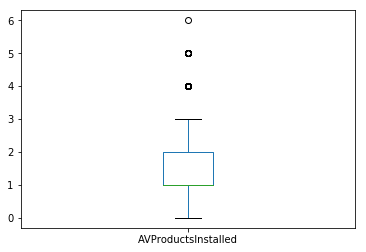

In [48]:
print((treino[numericos[0]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


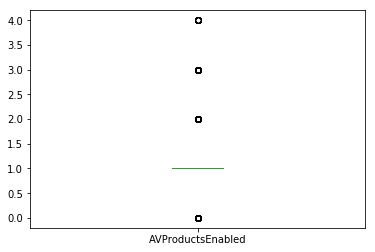

In [49]:
print((treino[numericos[1]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


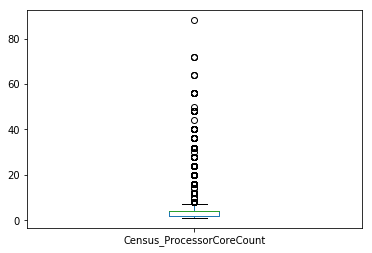

In [50]:
print((treino[numericos[2]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


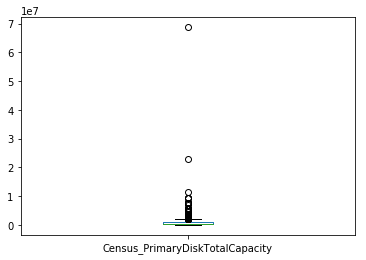

In [51]:
print((treino[numericos[3]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


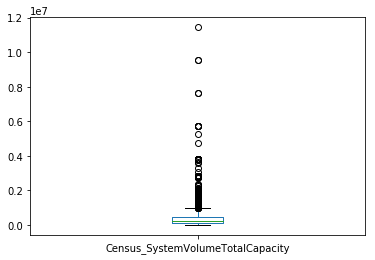

In [52]:
print((treino[numericos[4]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


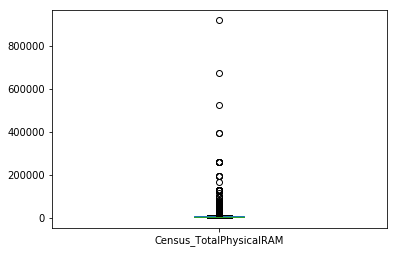

In [53]:
print((treino[numericos[5]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


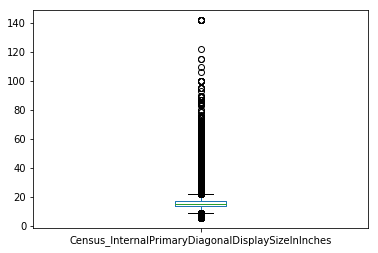

In [54]:
print((treino[numericos[6]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


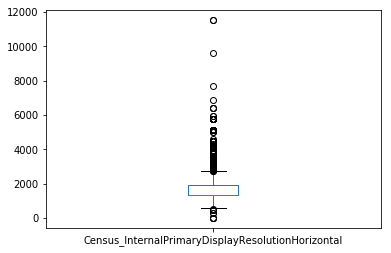

In [55]:
print((treino[numericos[7]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


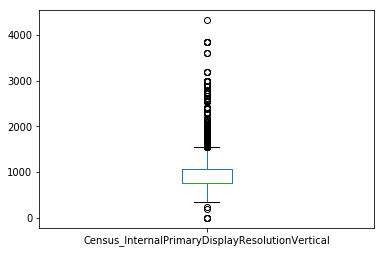

In [56]:
print((treino[numericos[8]]).plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


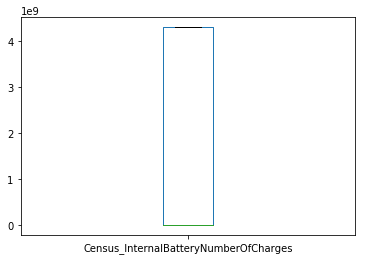

In [57]:
print((treino[numericos[9]]).plot.box())

**Variáveis sem outliers**

Definimos que as seguintes variáveis não mostram evidência significativa de conterem *outliers*:
- Census_InternalBatteryNumberOfCharges
- AVProductsInstalled
- AVProductsEnabled

### Tratar NAs das variáveis numéricas/continuas

Se a variavel tem outliers substituir por mediana. Caso contrário substituir pela média.

In [ ]:
subNum = treino[numericos].median()
subNum['Census_InternalBatteryNumberOfCharges'] = treino['Census_InternalBatteryNumberOfCharges'].mean()
subNum['AVProductsInstalled'] = treino['AVProductsInstalled'].mean()
subNum['AVProductsEnabled'] = treino['AVProductsEnabled'].mean()
q1 = treino[numericos].quantile(0.25)
q3 = treino[numericos].quantile(0.75) 
divisao = q3 - q1
divisao['Census_InternalBatteryNumberOfCharges'] = treino['Census_InternalBatteryNumberOfCharges'].std()
divisao['AVProductsInstalled'] = treino['AVProductsInstalled'].std()
divisao['AVProductsEnabled'] = treino['AVProductsEnabled'].std()
for coluna in numericos:
    if(ms[coluna].isna().sum() > 0):
        ms[coluna].fillna(subNum[coluna],inplace=True)
ms[numericos].isna().sum().sum()

In [ ]:
ms.isna().sum().sum()

### Standardização dos dados numéricos

In [ ]:
divisao

In [ ]:
treinoStd = ( treino[numericos] - subNum ) / divisao
treinoStd.describe()

### Realizar one-hot encoding
Decidimos codificar uma função que realiza o one-hot-encoding das variáveis necessárias

In [ ]:
import gc
def oneHotEncoding(serie):
    colunas = serie.unique()
    dic = {}
    for coluna in colunas:
        dic[serie.name + '_' + str(coluna)] = []
    for i in serie:
        dic[serie.name + '_' + str(i)].append(1)
        for j in colunas:
            if j != i:
                dic[serie.name + '_' + str(j)].append(0)
    r = pd.DataFrame(dic)
    del dic
    gc.collect()
    return r

Para cada variável que podia ser tratada e fosse necessário o one-hot encoding realizamos o mesmo e gravamos num ficheiro.
<code>encode = [i for i in tratar if len(ms[i].unique()) > 2]
for var in encode:
        aux = oneHotEncoding(ms[var])
        aux.to_csv('./encoding/' + var +'-1hot.csv', sep=',', encoding='utf-8')</code>
De seguida juntamos todas as variáveis que já tivessem sido tratadfas num único ficheiro.

### Prever os restantes com Random Forests
De seguida vamos prever os valores dos NAs das variáveis que faltam ser tratadas. 
Para isso apenas realizamos uma Random Forest e prevemos o valor, sendo que a random forest apenas é treinada com os dados de treino considerados (não pode usar os de teste).

Temos plena noção que o ideal seria tentar arranjar o melhor modelo para prever estes NAs fazendo vários modelos e vendo qual seria o melhor (basicamente o mesmo que vamos realizar para prever se tem deteções), no entanto devido à falta de tempo não nos foi possível utilizar esse método.

## Definir os tipos
Tivemos de definir os tipos das variáveis categóricas para ser possível carregar o conjunto de dados

In [12]:
import pandas as pd
numericos = ['AVProductsInstalled',
'AVProductsEnabled',
'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity',
'Census_SystemVolumeTotalCapacity',
'Census_TotalPhysicalRAM',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_InternalBatteryNumberOfCharges']
dtype = {}
for df in pd.read_csv('encoding/final_sembat.csv',low_memory=False,chunksize=10):
    for var in df.columns:
        if var not in numericos:
            dtype[var] = 'int8'
    break

Tivemos de definir os tipos para int8 para que não ocupe demasiado espaço, caso contrário não era possível carregar o dataset. Para além disso tivemos de ir lendo o dataset em *chunks* e juntando-os pois a função **read_csv** tem problemas de memória.

In [13]:
import pandas as pd
auxPred = pd.DataFrame()
i = 0
for tp in pd.read_csv('encoding/final_sembat.csv',low_memory=False,chunksize=50000,dtype=dtype):
    if i == 0:
        auxPred = pd.concat([auxPred,tp])
    else:
        auxPred = pd.concat([auxPred,tp],ignore_index=True)
    i+=1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


Função que realiza o treino do modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def realizaSVM(inp,out):
    is_na = out.isna()
    indice = [i for i in range(len(is_na)) if is_na[i] == False]
    auxI = inp.iloc[indice]
    auxO = out.iloc[indice]
    neigh = RandomForestClassifier(n_estimators=10, max_depth=50)
    print(auxO.shape)
    neigh.fit(auxI,auxO)
    return neigh

Função que preenche os valoers nulos consoante o modelo retornado pela função anterior. De seguida realiza o one-hot encoding e grava num ficheiro.

In [ ]:
def realizaPrevEOfC(nome,treinoT,aux,ms):
    oi = ms[nome]
    oi = oi.astype('category')
    svm_oi = realizaSVM(aux[:treinoT],oi[:treinoT])
    is_na = oi.isna()
    indice = [i for i in range(len(is_na)) if is_na[i] == True]
    X_Prev = aux.iloc[indice]
    previsto = svm_oi.predict(X_Prev)
    for i in range(len(indice)):
        oi[indice[i]] = previsto[i]
    print(oi.isna().sum())
    if oi.nunique() > 2:
        gr = oneHotEncoding(oi)
    else:
        gr = oi
    gr.to_csv('./encoding/' + oi.name +'-1hot.csv', sep=',', encoding='utf-8')

Percorremos todas as variáveis que faltavam tratar e aplicamos o método descrito anteriormente.

<code>for var in verTratar:
    treinoT = 550000
    realizaPrevEOfC('Wdft_RegionIdentifier',treinoT,auxPred,ms)</code>

In [14]:
trainX = auxPred.loc[:499999, auxPred.columns != 'HasDetections']
valX = auxPred.loc[500000:549999, auxPred.columns != 'HasDetections']
testX = auxPred.loc[550000:599999, auxPred.columns != 'HasDetections']
trainY = auxPred.loc[:499999,'HasDetections']
valY = auxPred.loc[500000:549999,'HasDetections']
valY = auxPred.loc[550000:599999,'HasDetections']
print(trainX.shape)
print(valX.shape)
print(trainY.shape)
print(valY.shape)

(500000, 707)
(50000, 707)
(500000,)
(50000,)


## Variance threshold
Para redução da dimensionalidade realizamos um filtro de variância. Obviamente podíamos ter usado outros métodos como **SelectKBest** ou **SelectPercentile**, no entanto decidimos usar apenas o filtro de variância pelo facto de os modelos lidarem bem com muitas colunas e porque não tínhamos muito tempo para perceber quantos preditores devíamos considerar (podia ser um "hiper-parâmetro"). Inicialmente a ideia até passou por usar **PCA**, no entanto a mesma foi logo desconsiderada pelo facto de existirem demasiadas variáveis categóricas.

Não quisemos definir um filtro de variância demasiado alto, pois possibilitava a eliminação de demasiadas colunas e definimos o limite em 0.1%.

In [15]:
import gc
import math
from sklearn.feature_selection import VarianceThreshold
def realizaVarThreshold():
    indices = []
    col = trainX.columns
    total = len(col)
    chunk = math.floor(total / 10)
    print(chunk)
    quantos = 0
    for i in range(chunk):
        sel = VarianceThreshold(threshold=0.001)
        try:
            sel.fit(trainX[col[quantos:quantos+10]])
            aux = [i+quantos for i in sel.get_support(indices=True)]
            indices.extend(aux)
        except:
            pass
        del sel
        gc.collect()
        quantos = quantos+10
    sel = VarianceThreshold(threshold=0.001)
    try:
        sel.fit(trainX[col[quantos:quantos+7]])
        indices.extend(sel.get_support(indices=True))
    except:
        pass
    del sel
    gc.collect()
    return indices

In [16]:
indices = realizaVarThreshold()
print(len(indices))
col = []
coln = trainX.columns
for i in indices:
       col.append(coln[i])

70
300


In [17]:
trainX[col]

,Census_OSInstallLanguageIdentifier_37.0,Census_OSInstallLanguageIdentifier_8.0,Census_OSInstallLanguageIdentifier_10.0,Census_OSInstallLanguageIdentifier_9.0,Census_OSInstallLanguageIdentifier_7.0,Census_OSInstallLanguageIdentifier_30.0,Census_OSInstallLanguageIdentifier_25.0,Census_OSInstallLanguageIdentifier_20.0,Census_OSInstallLanguageIdentifier_27.0,Census_OSInstallLanguageIdentifier_35.0,...,Wdft_RegionIdentifier_10.0,Wdft_RegionIdentifier_11.0,Wdft_RegionIdentifier_15.0,Wdft_RegionIdentifier_3.0,Census_OSInstallLanguageIdentifier_37.0,Census_OSInstallLanguageIdentifier_8.0,Census_OSInstallLanguageIdentifier_10.0,Census_OSInstallLanguageIdentifier_9.0,Census_OSInstallLanguageIdentifier_7.0,Census_OSInstallLanguageIdentifier_30.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Seleção de modelos

### Otimização de hiper-parâmetros

Realizamos uma função que realiza uma pesquisa aleatório para otimização de hyper-parâmetros.

Basicamente a função recebe um conjunto (dicionário) dos parâmetros possíveis e seleciona 10 combinações aleatórias retiradas desse conjunto. Depois para cada uma das combinações realiza o fit do modelo (que é passado como parâmetro) e faz o *score* do mesmo consoante os dados de validação. Todos os dados são pasados como parâmetro.

Decidimos usar para o *score* o método **AUC** pelo facto de ser este o utilizado na competição na qual este conjunto de dados foi lançado.

In [ ]:
from sklearn.model_selection import ParameterSampler
import copy
import gc
from sklearn.metrics import roc_curve, auc
def hyper_parameter_optimization(params, modeloG, testX, testY, trainX, trainY):
    lista_parametros = list(ParameterSampler(params, n_iter=10, random_state=10))
    for elem in lista_parametros:
        altera = False
        for key, value in elem.items():
            if key == 'solver':
                if value in ['newton-cg','lbfgs','sag']:
                    altera = True
        if altera == True:
            elem['penalty'] = 'l2'
    tabelaFinal = []
    for param in lista_parametros:
        print(param)
        modelo = copy.copy(modeloG)
        modelo.set_params(**param)
        #print(modelo.get_params())
        modelo.fit(trainX,trainY)
        pred = modelo.predict(testX)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, pred)
        score = auc(false_positive_rate, true_positive_rate)
        elem = param.copy()
        elem['score'] = score
        tabelaFinal.append(elem)
        del modelo
        gc.collect()
    return tabelaFinal

In [ ]:
raise

### Support Vector Machine

Como o método tradicional demorava demasiado tempo a treinar o modelo, decidimos usar o **SGDClassifier** que implementa modelos lineares utilizando um gradiente descendente estocástico, sendo muitissimo mais rápido que uma SVM normal. Os únicos parametros que precisaram ser ajustados para estes modelos se equipararem foi o **loss** com o valor **hinge** e o **penalty** com o valor **l2**.

### Totalidade dos dados

In [ ]:
decimal = [0.1*x for x in range(1,11)]
c=[0.1,1,10,100,1000]
a = [1/(s*500000) for s in c]

parametros = {'eta0':decimal,'learning_rate':['constant','optimal','invscaling','adaptive'],'alpha':a}
modelosSVM = hyper_parameter_optimization(parametros,clf,X_val,y_val,X_train,y_train)

In [60]:
tabelaSVM = pd.DataFrame(modelosSVM)
tabelaSVM.sort_values(by='score',ascending=False)

,alpha,eta0,learning_rate,score
7,2.000000e-06,0.4,adaptive,0.521874
4,2.000000e-06,0.4,constant,0.516116
3,2.000000e-09,1.0,invscaling,0.515285
8,2.000000e-06,0.8,optimal,0.507528
9,2.000000e-05,0.1,invscaling,0.504665
2,2.000000e-05,0.6,constant,0.503552
6,2.000000e-09,0.1,invscaling,0.500120
5,2.000000e-05,0.5,adaptive,0.500000
1,2.000000e-05,0.2,optimal,0.499242
0,2.000000e-06,0.5,adaptive,0.486943


### Com os dados do Variance Threshold

In [4]:
decimal = [0.1*x for x in range(1,11)]
c=[0.1,1,10,100,1000]
a = [1/(s*500000) for s in c]

parametros = {'eta0':decimal,'learning_rate':['constant','optimal','invscaling','adaptive'],'alpha':a}
modelosSVMVT = hyper_parameter_optimization(parametros,clf,X_val[col],y_val,X_train[col],y_train)

In [5]:
tabelaSVMVT = pd.DataFrame(modelosSVMVT)
tabelaSVMVT.sort_values(by='score',ascending=False)

,alpha,eta0,learning_rate,score
7,2.000000e-06,0.4,adaptive,0.519387
1,2.000000e-05,0.2,optimal,0.518521
9,2.000000e-05,0.1,invscaling,0.512245
6,2.000000e-09,0.1,invscaling,0.511094
3,2.000000e-09,1.0,invscaling,0.509088
8,2.000000e-06,0.8,optimal,0.505287
2,2.000000e-05,0.6,constant,0.500445
0,2.000000e-06,0.5,adaptive,0.500060
4,2.000000e-06,0.4,constant,0.493800
5,2.000000e-05,0.5,adaptive,0.482379


### Regressão Logística

Devido às limitações de poder computacional do grupo, apenas foi possível realizar o treino dos modelos com 100000 exemplos. Deste modo selecionamos 100000 exemplos dos 500000 definidos para o treino e treinamos os nossos modelos de regressão logística com esses exemplos.

In [ ]:
trainX2 = trainX[:99999]
trainY2 = trainY[:99999]

Com o objetivo de obter vários modelos com parâmetros diferentes, utilizamos a função *hyper_parameter_optimization* descrita acima. Como parâmetros de estimação, decidimos tentar vários valores para o inverso do parâmetro de regularização, **C**, para a norma utilizada na penalização, **penalty**, e para o algoritmo de otimização, **solver**. No excerto de código seguinte é possível verificar a gama de valores na qual variamos cada um destes três parâmetros.

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

parametros = {'C':[0.001,0.01,0.1,1],
              'penalty':['l1','l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

logisticRegr = LogisticRegression(max_iter=100)

modelosRegLog = hyper_parameter_optimization(parametros,logisticRegr,valX,valY,trainX2,trainY2)

#### Tabela com os parâmetros dos 10 modelos testados
De seguida é possível observar scores de 10 modelos originados por 10 conjuntos de parâmetros. De notar que estes 10 conjuntos são escolhidos aleatoriamente.

In [ ]:
tabelaRLog = pd.DataFrame(modelosRegLog)
tabelaRLog.sort_values(by='score',ascending=False)

De modo a não ser necessário efetuar recorrentemente os mesmos cálculos (muito dispendiosos em termos de tempo de execução), fizemos uma análise mais aprufundada, com 25 combinações diferentes dos parâmetros apresentados acima e armazenamos os resultados dos melhores modelos. Na seguinte tabela podemos observar os 6 modelos que obtiveram melhor pontuação:

In [23]:
import pandas as pd
d = {'C': [1.000, 0.010, 0.001, 0.100, 0.010, 1.000], 
     'penalty': ['l1', 'l1', 'l2', 'l2', 'l2', 'l2'],
     'solver':['liblinear', 'liblinear', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg'],
     'score': [0.65226, 0.64746, 0.62702, 0.61828, 0.60736, 0.54390]}
df = pd.DataFrame(data=d)
df

,C,penalty,solver,score
0,1.000,l1,liblinear,0.65226
1,0.010,l1,liblinear,0.64746
2,0.001,l2,newton-cg,0.62702
3,0.100,l2,newton-cg,0.61828
4,0.010,l2,newton-cg,0.60736
5,1.000,l2,newton-cg,0.54390


### Regressão Logística: Variance threshold = 0.001

Seguem-se os resultados obtidos com os dados de treino após se aplicar um threshold de variância nos mesmos.

In [ ]:
parametros = {'C':[0.001,0.01,0.1,1],
              'penalty':['l1','l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

logisticRegr = LogisticRegression(max_iter=100)

modelosRegLog2 = hyper_parameter_optimization(parametros,logisticRegr,valX[col],valY,trainX2[col],trainY2)

#### Tabela com os parâmetros dos 10 modelos testados

In [ ]:
tabelaRLog2 = pd.DataFrame(modelosRegLog2)
tabelaRLog2.sort_values(by='score',ascending=False)

À semelhança do teste anterior, fizemos uma análise com 25 combinações diferentes dos parâmetros e registamos o valor dos melhores modelos. Na seguinte tabela podemos observar os 6 modelos que obtiveram melhor pontuação:

In [24]:
import pandas as pd
d = {'C': [1.000, 0.010, 1.000, 0.010, 0.100, 0.001], 
     'penalty': ['l1', 'l1', 'l2', 'l2', 'l2', 'l2'],
     'solver':['liblinear', 'liblinear', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg'],
     'score': [0.65228, 0.64738, 0.62150, 0.61460, 0.61294, 0.54404]}
df = pd.DataFrame(data=d)
df

,C,penalty,solver,score
0,1.000,l1,liblinear,0.65228
1,0.010,l1,liblinear,0.64738
2,1.000,l2,newton-cg,0.62150
3,0.010,l2,newton-cg,0.61460
4,0.100,l2,newton-cg,0.61294
5,0.001,l2,newton-cg,0.54404


## Random forests

Relativamente aos hiper-parâmetros que foram considerados para o método de **Random Forests** os mesmos foram os seguintes:
- *n_estimators* - o número de árvores usadas para prever
- *max_features* - o máximo número de preditores considerado (apenas consideramos 2 valores, que correspondem à raiz quadrada ou ao logaritmo)
- *max_depth* - a profundidade máxima da árvore
- *criterion* - o critério de seleção na decisão

Estes foram os parâmteros que nos pareceram mais interessantes. Não conseguimos utilizar muito bem o que queríamos, porque por exemplo gostavamos de ter utilizado números mais elevados de estimadores ou não definindo limites ao número de variáveis. Não foi possível pelo facto de o conjunto de dados ser demasiado grande o que não permitia que o modelo conseguisse realizar o *fit*.
De referir apenas que com os dados obtidos com o filtro de variância conseguimos utilizar 100 estimadores pois eram menos dados.

#### Com todos os atributos

In [19]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [4, 8, 16, 32, 64]#, 100, 200]
max_features = ['auto','log2']
max_depth = [32,64,128,None]
criterion = ['gini','entropy']
parametros = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'criterion':criterion}
m = RandomForestClassifier()
tabela = hyper_parameter_optimization(parametros,m,valX,valY,trainX,trainY)

In [20]:
import pandas as pd
tab = pd.DataFrame(tabela)
tab.sort_values(by='score',ascending=False)

,criterion,max_depth,max_features,n_estimators,score
7,gini,32.0,auto,32,0.661923
9,gini,64.0,log2,64,0.655149
0,entropy,32.0,auto,8,0.646573
3,gini,NaN,auto,16,0.644740
8,gini,NaN,log2,16,0.636702
1,entropy,32.0,log2,8,0.633819
6,gini,128.0,auto,8,0.628578
2,gini,128.0,log2,8,0.615860
5,entropy,128.0,log2,4,0.601088
4,gini,NaN,log2,4,0.596266


#### Apenas com os atributos que passaram o filtro de variância

In [ ]:
trainX = auxPred.loc[:499999, col]
valX = auxPred.loc[500000:549999, col]
from sklearn.ensemble import RandomForestClassifier
n_estimators = [8, 16, 32, 64, 100]
max_features = ['auto','log2']
max_depth = [32,64,128,None]
criterion = ['gini','entropy']
parametros = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'criterion':criterion}
m = RandomForestClassifier()
tabelaVT = hyper_parameter_optimization(parametros,m,valX,valY,trainX,trainY)

In [22]:
import pandas as pd
tabVT = pd.DataFrame(tabelaVT)
tabVT.sort_values(by='score',ascending=False)

,criterion,max_depth,max_features,n_estimators,score
7,gini,32.0,auto,64,0.667463
9,gini,64.0,log2,100,0.658444
0,entropy,32.0,auto,16,0.657307
3,gini,NaN,auto,32,0.655033
1,entropy,32.0,log2,16,0.652853
8,gini,NaN,log2,32,0.649633
6,gini,128.0,auto,16,0.643742
2,gini,128.0,log2,16,0.640022
5,entropy,128.0,log2,8,0.629723
4,gini,NaN,log2,8,0.626342


### Seleção do melhor modelo
Como podemos ver nas tabelas acima o melhor modelo nos dados de validação foi o modelo que usa o método de **Random Forest** com os seguintes parâmteros:
- criterion: gini
- max_depth: 32
- max_features: auto (raiz quadrada)
- n_estimators: 64

Para além disso este modelo usa apenas as coluna que passam no filtro de variância.

Este modelo obteve um score de 0.667 (AUC).

Para treinar o modelo agora usamos todos os dados tirando os de teste

In [19]:
from sklearn.ensemble import RandomForestClassifier
bestModel = RandomForestClassifier()
params = {'criterion':'gini','max_depth':32,'max_features':'auto','n_estimators':64}
bestModel.set_params(**params)
trainX = auxPred.loc[:549999, col]
testX = auxPred.loc[550000:599999, col]
trainY = auxPred.loc[:549999, 'HasDetections']
testY = auxPred.loc[550000:599999, 'HasDetections']

In [24]:
bestModel.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
from sklearn.metrics import roc_curve, auc
pred = bestModel.predict(testX)
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, pred)
score = auc(false_positive_rate, true_positive_rate)

Score final do modelo

In [27]:
score

0.6658823358606796

# Discussão de resultados

       
   No decorrer desta primeira fase, o grupo sentiu algumas dificuldades que serão explicadas de seguida. A primeira passou pela falta computacional que era necessária devido a dimensão do dataset escolhido. Assim sendo fomos forçados a diminuir a quantidade de dados utilizados, ficando apenas com cerca de 8% do dataset inicial (600 000 linhas).Esta falta de performance também nos impediu de utilizar o método de Support Vector Machine original presente no *scikit-learn*, visto que o tempo de execução para treino do modelo era insustentável, mesmo quando eram utilizados um conjunto de dados muito reduzidos. Além disso, como o dataset escolhido possuía cerca de oitenta variáveis, foi-nos impossível efetuar uma análise detalhada individual, uma vez que era um processo exaustivo que não era compatível com o tempo disponível para o efeito.
   
   
   Uma outra dificuldade sentida está relacionada com a quantidade de NA's presente no dataset inicial. Apesar da sua dimensão (cerca de 8 000 000 linhas), não existia uma única linha que não contivesse pelo menos um valor nulo. Por isso fomos obrigados a definir estratégias que colmatassem essa falha.O facto dos atributos deste dataset serem maioritariamente categóricos (existiam apenas 10 numéricos) também nos causou alguns transtornos pois inviabilizou à partida a possibilidade de se efetuarem alguns testes estatísticos que seriam úteis para perceber a importância do atributo. Nos categórios, o facto de existirem bastantes variáveis com uma quantidade de valores distintos enormes não agrupáveis, foi também um entrave sentido.
       
   Existem também alguns aspetos a melhorar que gostariamos de salientar. Caso dispuséssemos de mais recursos gostaríamos de não ter sido tão restritivos e eliminado um numéro tão grande de variáveis.No caso da eliminação de variáveis gostaríamos também de ter utilizado outros testes além do *variance threshold*, mas como foi referido anteriormente a dimensionalidade foi bastante condicionadora. Por último sentimos que deveríamos ter feito uma avaliação aos modelos utilizados na previsão dos NA's. 
   
   Apesar das dificuldades sentidas e de estarmos a utilizar apenas modelos de *machine learning* tradicionais, consideramos que os resultados obtidos pelo melhor modelo são bastante aceitáveis. Utilizando como referência a competição do *Kaggle* onde foi utilizado este dataset, o nosso modelo criado com *Random Forest* obteve um *score* de **0.66588**, que o coloca em segundo lugar da competição, pelo que estamos satisfeitos com o resultado obtido.




# Referências
- https://scikit-learn.org
- https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
- https://pandas.pydata.org/pandas-docs/
- https://realpython.com/tutorials/data-science/
- https://www.springboard.com/blog/data-mining-python-tutorial/
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/